In [1]:
import pandas as pd

import trees
import util

In [2]:
bikes = pd.read_csv("SeoulBikeData.csv")
train, dev = util.split(bikes, [0.8, 0.2], seed=2022)

TARGET = "Rented Bike Count"

In [14]:
dtree = trees.Tree(min_leaf_size=100, verbose=False)

In [15]:
dtree.train(train, TARGET)

In [16]:
len(dtree.tree)

101

In [17]:
preds = dtree.predict(dev)
preds

10       246.262136
12       269.704762
17       399.248120
34       269.704762
38       397.089041
           ...     
8748     824.089431
8750     824.089431
8754    1028.360825
8757    1028.360825
8759    1028.360825
Length: 1752, dtype: float64

In [18]:
dev.assign(preds = preds)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,preds
10,1/12/2017,339,10,-3.5,24,1.2,1996,-21.2,0.65,0.0,0.0,Winter,No Holiday,Yes,246.262136
12,1/12/2017,449,12,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,Winter,No Holiday,Yes,269.704762
17,1/12/2017,555,17,0.8,58,1.6,2000,-6.5,0.08,0.0,0.0,Winter,No Holiday,Yes,399.248120
34,2/12/2017,334,10,-0.4,57,1.6,1309,-7.8,0.80,0.0,0.0,Winter,No Holiday,Yes,269.704762
38,2/12/2017,611,14,7.3,35,1.3,1955,-7.1,0.99,0.0,0.0,Winter,No Holiday,Yes,397.089041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,30/11/2018,720,12,6.6,35,1.3,1409,-7.8,1.70,0.0,0.0,Autumn,No Holiday,Yes,824.089431
8750,30/11/2018,761,14,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,Autumn,No Holiday,Yes,824.089431
8754,30/11/2018,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes,1028.360825
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,1028.360825


In [19]:
dev.shape

(1752, 14)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Rented Bike Count', ylabel='Count'>

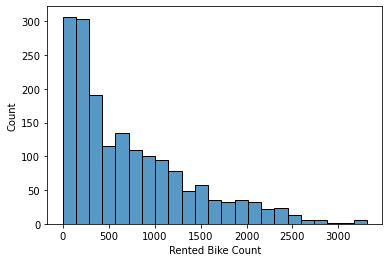

In [21]:
sns.histplot(dev, x="Rented Bike Count")

<AxesSubplot:ylabel='Count'>

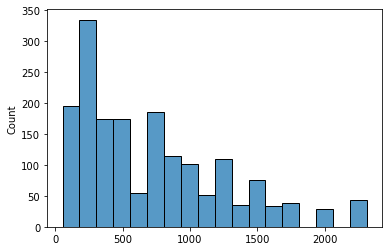

In [22]:
sns.histplot(preds)